## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
path = r'/Users/febingeorge/Documents/Career Foundry Notes'

In [5]:
df = pd.read_pickle(os.path.join(path,'Boat_Sales.pkl'),compression = 'infer')

In [23]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,Country,Prices in Euros
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Not Available,226,Switzerland,3570.59
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,Germany,3490.00
2,Sport Boat,Marine power boats,new boat from stock,2021,3.69,1.42,Aluminium,124,Switzerland,4033.90
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Not Available,64,Denmark,3367.00
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,Germany,3399.00


In [11]:
df.columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width',
       'Material', 'Number of views last 7 days', 'Country',
       'Prices in Euros'],
      dtype='object')

## Data Consistency Check 

In [25]:
df.isnull().sum()

Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
Country                        0
Prices in Euros                0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [15]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

/var/folders/vk/t91x8sx96dgcp872p9l713yh0000gn/T/ipykernel_1341/3630298113.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/vk/t91x8sx96dgcp872p9l713yh0000gn/T/ipykernel_1341/3630298113.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/vk/t91x8sx96dgcp872p9l713yh0000gn/T/ipykernel_1341/3630298113.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/vk/t91x8sx96dgcp872p9l713yh0000gn/T/ipykernel_1341/3630298113.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders

In [17]:
df.shape

(9888, 10)

In [19]:
pd.set_option('display.max_rows', 500)
df['Year Built'].value_counts()

Year Built
2020    1279
2019     663
0        551
2008     457
2007     393
2006     393
2018     351
2017     314
2005     307
2009     303
2004     270
2016     227
2003     226
2010     222
2011     211
2001     202
2015     199
2000     195
2002     188
2012     175
2014     168
2013     160
1996     147
1999     144
1995     138
1992     135
1991     130
1997     130
1990     120
1998     118
1994     113
1993      95
1989      86
1988      72
1980      69
1987      61
1978      57
1985      55
2021      53
1979      50
1986      50
1976      40
1981      40
1984      40
1974      30
1975      30
1983      27
1972      27
1982      25
1973      23
1971      20
1970      17
1967      16
1965      16
1977      14
1968      12
1969      11
1963      11
1961      11
1910      10
1962       8
1922       7
1958       7
1964       6
1960       6
1930       6
1950       6
1966       6
1954       5
1959       5
1925       5
1926       5
1948       5
1936       5
1955       5
1956       5
1

In [21]:
df['Year Built'].replace(0,2021,inplace = True)

/var/folders/vk/t91x8sx96dgcp872p9l713yh0000gn/T/ipykernel_1341/744843121.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year Built'].replace(0,2021,inplace = True)


In [79]:
df['Views Per Country'] = df.groupby(['Country'])['Number of views last 7 days'].transform(np.sum)

/var/folders/vk/t91x8sx96dgcp872p9l713yh0000gn/T/ipykernel_16686/1796677537.py:1: FutureWarning: The provided callable <function sum at 0x110f43600> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df['Views Per Country'] = df.groupby(['Country'])['Number of views last 7 days'].transform(np.sum)


In [81]:
df.columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width',
       'Material', 'Number of views last 7 days', 'Country', 'Prices in Euros',
       'Views Per Country'],
      dtype='object')

In [83]:
df.dtypes

Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Number of views last 7 days      int64
Country                         object
Prices in Euros                float64
Views Per Country                int64
dtype: object

In [99]:
df.describe()

,Year Built,Length,Width,Number of views last 7 days,Prices in Euros,Views Per Country
count,9888.000000,9888.000000,9888.000000,9888.000000,9.888000e+03,9888.000000
mean,2005.811286,11.570017,3.520123,149.160801,3.031812e+05,184457.942051
std,16.316642,6.000087,1.217073,151.819752,9.704909e+05,114509.528602
min,1885.000000,1.040000,0.010000,13.000000,3.224000e+03,46.000000
25%,2000.000000,7.470000,2.550000,70.000000,4.300000e+04,97125.000000
50%,2008.000000,10.300000,3.350000,108.000000,9.402650e+04,122568.000000
75%,2019.000000,13.920000,4.250000,172.000000,2.490000e+05,300033.000000
max,2021.000000,100.000000,25.160000,3263.000000,3.100000e+07,382211.000000


In [27]:
df.to_csv(os.path.join(path, 'df_Visualization.csv'))

## Hypothesis- Numbers of views will be high for latest build boats(Year Built)

## Check Extreme values

/var/folders/vk/t91x8sx96dgcp872p9l713yh0000gn/T/ipykernel_16686/3673360664.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Views Per Country'],bins = 25)


<Axes: xlabel='Views Per Country', ylabel='Density'>

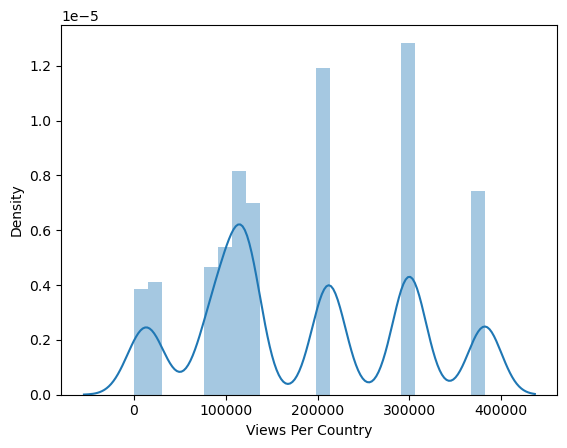

In [147]:
sns.distplot(df['Views Per Country'],bins = 25)

## Data preparation regression analysis

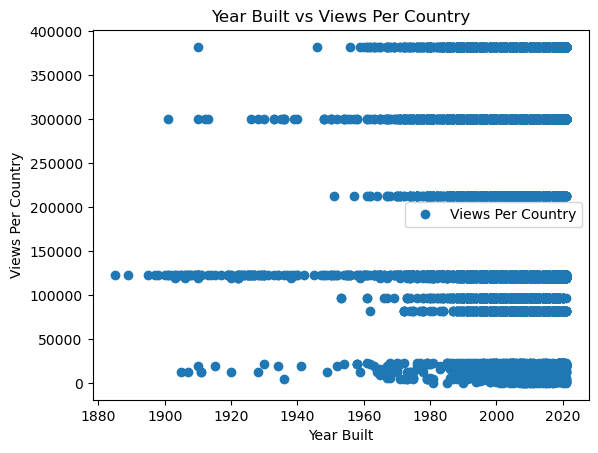

In [149]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'Year Built',y = 'Views Per Country',style = 'o') # The style option creates a scatterplot; without it, we only have lines.
plt.title  ('Year Built vs Views Per Country')
plt.xlabel('Year Built')
plt.ylabel('Views Per Country')
plt.show()

In [151]:
### reshapeing the variables
X = df['Year Built'].values.reshape(-1,1)
y = df['Views Per Country'].values.reshape(-1,1)

In [153]:
X

array([[2017],
       [2020],
       [2021],
       ...,
       [2020],
       [2018],
       [2019]])

In [155]:
y

array([[382211],
       [300033],
       [382211],
       ...,
       [300033],
       [212238],
       [382211]])

In [157]:
## split the variables on training set and test set

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [159]:
##creat regression object

regression = LinearRegression()

In [161]:
## fit the regression object into the training set
regression.fit(X_train,y_train)

LinearRegression()

In [163]:
#predict the values of y using X
y_predicted = regression.predict(X_test)

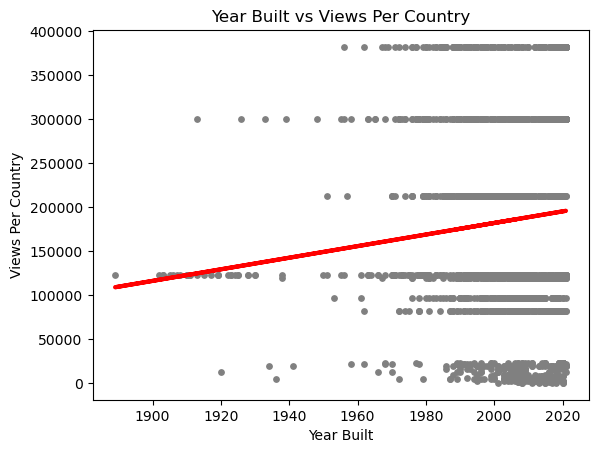

In [165]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Year Built vs Views Per Country')
plot_test.xlabel('Year Built')
plot_test.ylabel('Views Per Country')
plot_test.show()

In [167]:
## create model summary statitics
rmse = mean_squared_error(y_test,y_predicted)
r2 = r2_score(y_test,y_predicted)

In [169]:
print('Slope:',regression.coef_)
print('Mean Squared error:' ,rmse)
print('r2:' , r2)

Slope: [[658.62743618]]
Mean Squared error: 12836064860.076866
r2: 0.008089983786037869


In [179]:
##checking actual value vs predicted value
data = pd.DataFrame({'Actual' : y_test.flatten(),'Predicted': y_predicted.flatten()})

In [181]:
data.head(30)

,Actual,Predicted
0,81986,174767.469338
1,119735,190574.527806
2,119735,195184.919860
3,300033,175426.096774
4,119735,195184.919860
5,122568,183329.626008
6,382211,195184.919860
7,212238,187940.018062
8,212238,184646.880881
9,119735,195184.919860


## Interpretation

The slope is positive, so the relationship is positive. This aligns with my hypothesis that Latest build boats will get more number of views, The MSE is high at 12836064860.076866 , so the regression line is not at all a representation of the data. Also, the R2 score of 0.0080 represents a poor fit.

### Compare how the regression fits the training set

In [188]:
y_predict_train = regression.predict(X_train)

In [192]:
rmse1 = mean_squared_error(y_train,y_predict_train)
r2 = r2_score(y_train,y_predict_train)

In [194]:
print('Slope:',regression.coef_)
print('Mean Squared error:' ,rmse)
print('r2:' , r2)

Slope: [[658.62743618]]
Mean Squared error: 12836064860.076866
r2: 0.00875754586441968
